# Final Project


<IPython.core.display.Javascript object>

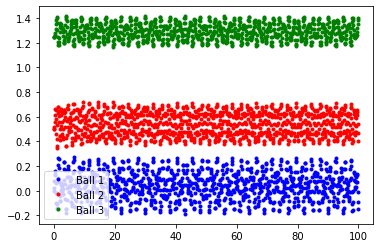

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from vpython import *

scene = canvas()



def f(r,t):
    x1 = r[0]
    x2 = r[1]
    x3 = r[2]
    v1 = r[3]
    v2 = r[4]
    v3 = r[5]
    dx1 = v1
    dx2 = v2
    dx3 = v3
    dv1 = (Fmax*np.cos(w*t)+k12*(x2-x1-L12))/m1
    dv2 = (-k12*(x2-x1-L12)+k23*(x3-x2-L23))/m2
    dv3 = -k23*(x3-x2-L23)/m3
    return np.array([dx1,dx2,dx3,dv1,dv2,dv3],float)
    
    
maxrate = 60
m1 = 1
m2 = 0.5
m3 = 1.5
L12 = 0.5
L23 = 0.75
k12 = 25
k23 = 15
x1,x2,x3 = 0, L12, L23+L12
v1, v2, v3 = 0,0,0
Fmax = 5
w = 2*np.pi

a = 0.0
b = 100
N = 1000
h = (b-a)/N

tpoints = np.arange(a,b,h)
x1points = []
x2points = []
x3points = []

r = np.array([x1,x2,x3,v1,v2,v3],float)
ball1 = sphere(radius = L12/10, pos = vector(r[0],0,0),color = color.blue)
ball2 = sphere(radius = L12/10, pos = vector(r[1],0,0),color = color.red)
ball3 = sphere(radius = L12/10, pos = vector(r[2],0,0),color = color.green)

#scene.camera.pos += vector(L12,0,0)
for t in tpoints:
    rate(maxrate)
    x1points.append(r[0])
    x2points.append(r[1])
    x3points.append(r[2])
    ball1.pos= vector(r[0],0,0)
    ball2.pos= vector(r[1],0,0)
    ball3.pos= vector(r[2],0,0)

    k1 = h*f(r,t)
    k2 = h*f(r+0.5*k1,t+0.5*h)
    k3 = h*f(r+0.5*k2,t+0.5*h)
    k4 = h*f(r+k3,t+h)
    r += (k1+2*k2+2*k3+k4)/6
plt.plot(tpoints,x1points,'b.',label='Ball 1')
plt.plot(tpoints,x2points,'r.', label= 'Ball 2')
plt.plot(tpoints,x3points,'g.',label = 'Ball 3' )
plt.legend()
plt.show()

